In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics

**Importing the dataset**

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

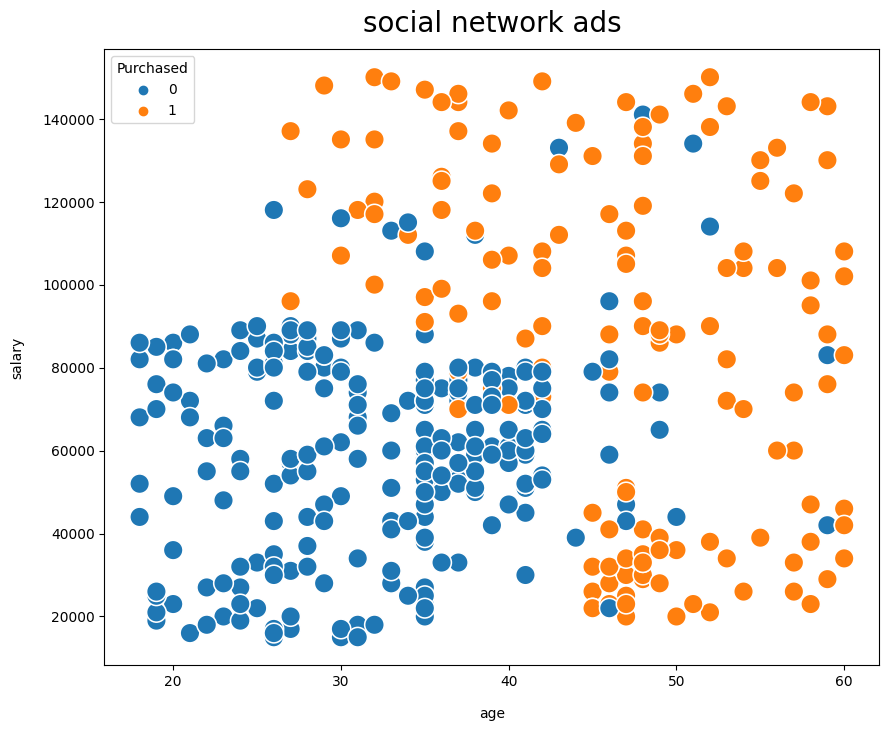

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("social network ads", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("salary", labelpad=13)
ax = plt.gca()

In [5]:
del df['User ID']

In [6]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [8]:
X = df[['Gender', 'Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

**Fitting Decision Tree Classification to the Training set**

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

**Predicting the Test set results**

In [11]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

Test set accuracy: 0.90
Test set auc: 0.89


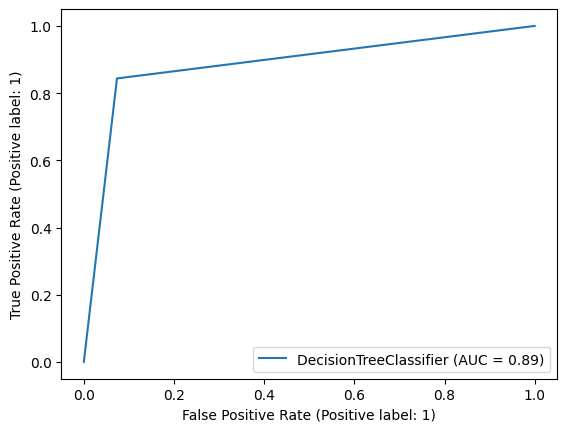

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
y_pred = dt.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
RocCurveDisplay.from_estimator(dt, X_test, y_test)

**Making the Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 5, 27]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

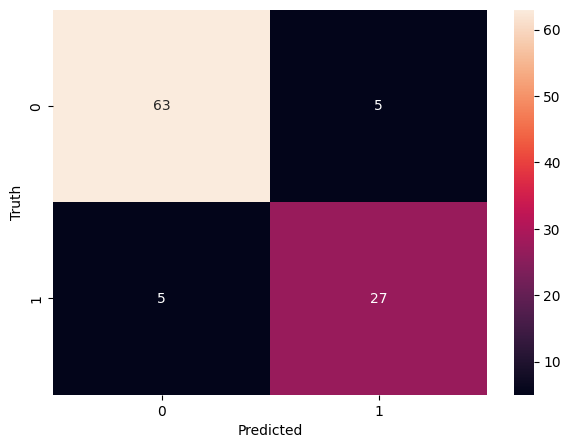

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Training set results**

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [19]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

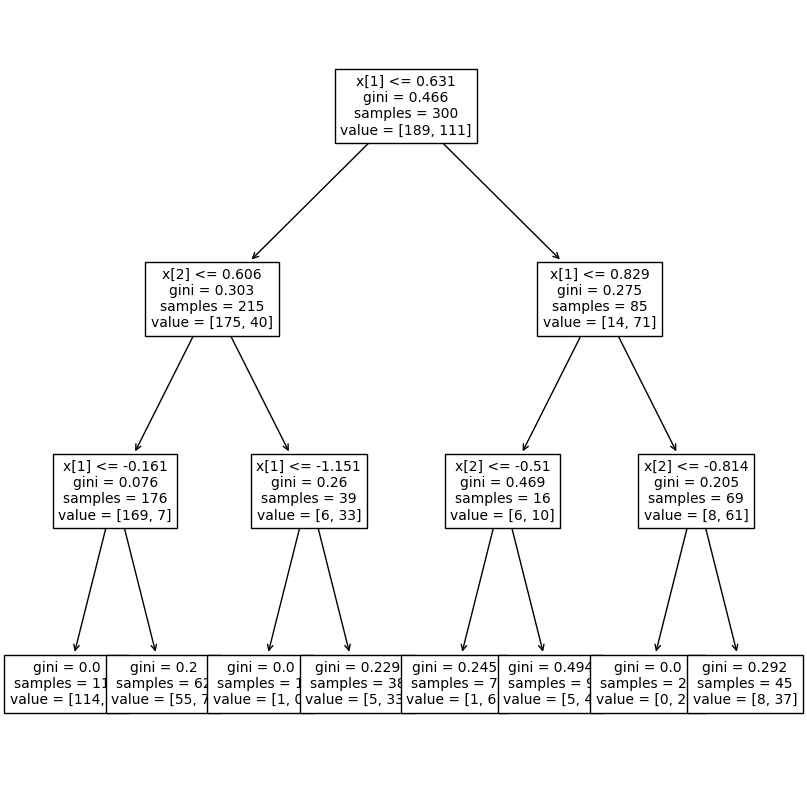

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

**Visualising the Test set results**

[Text(0.4506578947368421, 0.9615384615384616, 'x[1] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.21710526315789475, 0.8846153846153846, 'x[2] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(0.11842105263157894, 0.8076923076923077, 'x[1] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.09210526315789473, 0.7307692307692307, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14473684210526316, 0.7307692307692307, 'x[2] <= 0.403\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.11842105263157894, 0.6538461538461539, 'x[2] <= -0.06\ngini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(0.09210526315789473, 0.5769230769230769, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.14473684210526316, 0.5769230769230769, 'x[2] <= 0.027\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.11842105263157894, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17105263157894737, 0.5, 'x[2] <= 0.259\ngini = 0.245\nsamples

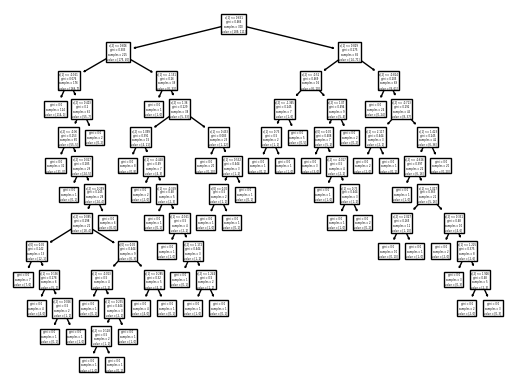

In [21]:
from sklearn import tree
tree.plot_tree(dt)